<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Типы данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В исследовании мы проделали следующие шаги:

* Изучили данные из файла
* Предобработали датафрейм (поработали с пропусками и типами данных, проверили на дубликаты)
* Сделали расчеты на основе датафрейма и добавили новые столбцы
* Провели исследовательский анализ данных
* Проверили редкие и выбивающие значения

## Изучение данных из файла

In [1]:
#Импортируем библиотеки, откроем датасет и посмотрим первые 5 строк
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.1f}'.format #отметим количество значений после точки
try:
    df = pd.read_csv('/Users/alekseivlasov/Desktop/project/3/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


In [2]:
#просмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

* В 14 столбцах встречаются пропущенные значения, с ними нужно будет поработать  
* Есть столбцы, где нужно поменять тип данных, пример: ``first_day_exposition`` лучше перевести в дату  
* Также, часто встречается тип ``float64``, который можно заменить на ``int64``

## Предобработка данных

### Работа с пропусками

In [3]:
#Узнаем, сколько пропусков в каждом столбце
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков много, пройдемся по каждому столбцу и исправим ситуацию

В столбцах ``floors_total`` и ``locality_name`` пропущено меньше 1% от датасета, поэтому можно удалить эти строки, чтобы они не мешали исследованию


In [4]:
#Удаляем строки с пропущенными значениями и проверяем
df = df.dropna(subset=['floors_total', 'locality_name'])
df['floors_total'].isna().sum()

0

In [5]:
df['locality_name'].isna().sum()

0

In [6]:
#посмтрим, какие значения встречаются в столбце apartment
df['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

В столбце ``is_apartment`` у нас булевое значение, которое указывает, является недвижимость апартаментами или нет      
Скорее всего, пропуски появились там, где квартира не является апартаментами  
Заполним пропуски значением ``False``

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(value = False) #подставим False вместо пропусков
df['is_apartment'].isna().sum() #проверим, правильно ли выполнили действие

0

In [8]:
#Проверим уникальные значения в столбце balcony
df['balcony'].value_counts()

1.0    4187
0.0    3680
2.0    3656
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

Пропуски в ``balcony`` обусловлены, возможно тем, что балкона в квартире  нет  
Заменим пропуски на "0"

In [9]:
df['balcony'] = df['balcony'].fillna(value='0') #заполним пропуски значением: '0'
df['balcony'].isna().sum() #проверяем код

0

Если в ``parks_around3000`` стоит '0', значит и в ``parks_nearest`` должен быть не пропуск, а значение '0' и наоборот  
Такая же логика в столбцах ``ponds_around3000`` и ``ponds_nearest``

Вначале заполним пробелы в парках

In [10]:
#заполним пропуски в parks_nearest
df.loc[df['parks_around3000'] == 0, 'parks_nearest'] = 0 
df['parks_nearest'].isna().sum()

5500

Вместо 15620 пропусков осталось 5500

In [11]:
#заполним пропуски в parks_around3000
df.loc[df['parks_nearest'] == 0, ['parks_around3000']] = 0
df['parks_around3000'].isna().sum()

5500

Столбец ``parks_around3000`` никак не поменялся

Сделаем тоже самое с пропусками в ``ponds_around3000`` и ``ponds_nearest``

In [12]:
#заполним пропуски в ponds_around3000
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'] = 0
df['ponds_nearest'].isna().sum()

5500

In [13]:
#заполним пропуски в ponds_nearest
df.loc[df['ponds_nearest'] == 0, 'ponds_around3000'] = 0
df['ponds_around3000'].isna().sum()

5500

Мы можем в столбце ``ceiling_height`` пропуски заполнить медианным значением по городам  
Но для этого нужно проверить уникальные значения в столбце ``locality_name``

In [14]:
df['locality_name'].unique() #выведим на экран уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
len(df['locality_name'].unique()) #и узнаем количество

364

Первое, что видем, это разное написание "Посёлка" (через "е" и "ё"), приведем к одному написанию

In [16]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

Встречаются строки "городской посёлок" и "посёлок городского типа"

In [17]:
#Заменим такие значения
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

Есть неявные дубли, которые нужно убрать

In [18]:
#Создадим функцию, которая поможет убрать неявные дубли
def locality_name_func(wrong_names, correct_names):
    df['locality_name'] = df['locality_name'].replace(wrong_names, correct_names)
    
wrong_names = ['посёлок Мурино', 'деревня Кудрово', 'посёлок Коммунары', 'посёлок городского типа Фёдоровское'
               , 'Никольское', 'коттеджный посёлок Лесное']
correct_names = ['Мурино', 'Кудрово', 'Коммунар', 'деревня Фёдоровское', 'село Никольское'
                , 'посёлок Лесное']

locality_name_func(wrong_names, correct_names)

In [19]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'посёлок городского типа Красный Бор',
       'Гатчина', 'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы

In [20]:
len(df['locality_name'].unique()) #посмотрим, на сколько уменьшилось количество уникальных значений

317

Теперь можем приступить к заполнению пропусков в столбце ``ceiling_height``

In [21]:
#С помощью цикла пройдемся по всем уникальным значениям и зполним пропуски средним значением
for city in df['locality_name'].unique():
    temp = df[df['locality_name'] == city]
    agg = temp['ceiling_height'].mean()
    df.loc[df['locality_name'] == city, 'ceiling_height'] = df['ceiling_height'].fillna(agg)
    
df['ceiling_height'].isna().sum()

98

После заполнения средним значением в столбцах все равно остались пропущенные значения, их меньше 1%, поэтому их можно удалить

In [22]:
df = df.dropna(subset=['ceiling_height'])
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1843
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2196
balcony                    0
locality_name              0
airports_nearest        5431
cityCenters_nearest     5408
parks_around3000        5407
parks_nearest           5407
ponds_around3000        5407
ponds_nearest           5407
days_exposition         3148
dtype: int64

Теперь поработаем с пропусками в столбцах: ``living_area`` и ``kitchen_area``

In [23]:
l_area = df[df['living_area'].isnull() == False]['total_area'].mean()\
    / df[df['living_area'].isnull()== False]['living_area'].mean() 

df['living_area'] = df['living_area'].fillna(df['total_area']/l_area)

In [24]:
k_area = df[df['kitchen_area'].isnull() == False]['total_area'].mean()\
    / df[df['kitchen_area'].isnull()== False]['kitchen_area'].mean() 

df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']/k_area)

In [25]:
#проверим выполнение кода
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,2.6,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,0.0,0.0,0.0,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,2.8,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,2.8,14.0,91.2,9,False,...,27.7,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


Остались пропуски, которые были оставленны уже системой, при автоматическом заполнении, пример: ``airports_nearest``, ``cityCenters_nearest``, ``parks_around3000``, ``parks_nearest``, ``ponds_around3000``, ``ponds_nearest`` и ``days_exposition``

Пропуски могли образоваться из-за определенных местоположений, так как в столбцах пропущено почти одинаковое количество значений  
Пропуски заполним специальными символами ``-1``

In [26]:
df = df.fillna(value = -1)
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [27]:
#Проверим наличие явных дублей в датафрейме
df.duplicated().sum()

0

Мы избавились от пропусков, которые были в датафрейме. Они могли образоваться по причине не заполнения полей пользователем при составлении объявления, либо просто отсутствие информации, как было с балконами ("балкона нет, ничего не напишу")

Помимо пропусков, оставленные пользователем, у нас еще есть автоматическое заполнение значений системой. Здесь мы обнаружили почти одинаковое количество пропущенных значений, что означает, пропуски могли появиться из-за определенных местоположений, так как информацию берется на основе картографических данных

Также удалили неявные дубли, которые могли помешать дальнейшему исследованию 

Посмотрим, сколько данных мы в итоге оставили в датафрейме

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23467 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23467 non-null  int64  
 1   last_price            23467 non-null  float64
 2   total_area            23467 non-null  float64
 3   first_day_exposition  23467 non-null  object 
 4   rooms                 23467 non-null  int64  
 5   ceiling_height        23467 non-null  float64
 6   floors_total          23467 non-null  float64
 7   living_area           23467 non-null  float64
 8   floor                 23467 non-null  int64  
 9   is_apartment          23467 non-null  bool   
 10  studio                23467 non-null  bool   
 11  open_plan             23467 non-null  bool   
 12  kitchen_area          23467 non-null  float64
 13  balcony               23467 non-null  object 
 14  locality_name         23467 non-null  object 
 15  airports_nearest   

В таблице изначально было 23699 строк и 21 столбец, мы оставили 23467 строк (избавились от 232 строк) и осталось такое же количество столбцов

### Типы данных

In [29]:
#посмотрим общую информацию и какие типы требуют замены
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23467 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23467 non-null  int64  
 1   last_price            23467 non-null  float64
 2   total_area            23467 non-null  float64
 3   first_day_exposition  23467 non-null  object 
 4   rooms                 23467 non-null  int64  
 5   ceiling_height        23467 non-null  float64
 6   floors_total          23467 non-null  float64
 7   living_area           23467 non-null  float64
 8   floor                 23467 non-null  int64  
 9   is_apartment          23467 non-null  bool   
 10  studio                23467 non-null  bool   
 11  open_plan             23467 non-null  bool   
 12  kitchen_area          23467 non-null  float64
 13  balcony               23467 non-null  object 
 14  locality_name         23467 non-null  object 
 15  airports_nearest   

Нужно заменить вначале тип ``float`` на ``int`` в столбцах, где могут быть только целые числа  
у нас есть: ``floors_total``, ``balcony``, ``parks_around3000``, ``ponds_around3000`` и ``days_exposition``

In [30]:
#Создадим функцию, которая поменяет тип данных
def change_type (item):
    df[item] = df[item].astype('int')
    
item = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition'] #создадим список
change_type(item) #применим функцию 

Еще есть столбец ``first_day_exposition``, нужно перевести значения в дату

In [31]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [32]:
#Проверим, изменился ли тип данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23467 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23467 non-null  int64         
 1   last_price            23467 non-null  float64       
 2   total_area            23467 non-null  float64       
 3   first_day_exposition  23467 non-null  datetime64[ns]
 4   rooms                 23467 non-null  int64         
 5   ceiling_height        23467 non-null  float64       
 6   floors_total          23467 non-null  int64         
 7   living_area           23467 non-null  float64       
 8   floor                 23467 non-null  int64         
 9   is_apartment          23467 non-null  bool          
 10  studio                23467 non-null  bool          
 11  open_plan             23467 non-null  bool          
 12  kitchen_area          23467 non-null  float64       
 13  balcony         

Поменяли тип данных, где это требовалось, теперь можем перейти к расчетам. Предобработка данных завершена

## Расчёты и добавление результатов в таблицу

In [33]:
#Расчитаем цену квадратного метра
df['price_square_meter'] = df['last_price']/df['total_area']

Теперь создадим столбцы со следующими значениями: день недели, месяц и год публикации объявления

In [34]:
df['day'] = df['first_day_exposition'].dt.day_name() #начнем со дня недели
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month #добавим месяц
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year #добавим год
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,False,...,"16,028.0",1,482.0,2,755.0,-1,"120,370.4",Thursday,3,2019
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,False,...,"18,603.0",0,0.0,0,0.0,81,"82,920.8",Tuesday,12,2018
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,False,...,"13,933.0",1,90.0,2,574.0,558,"92,785.7",Thursday,8,2015
3,0,"64,900,000.0",159.0,2015-07-24,3,2.8,14,91.2,9,False,...,"6,800.0",2,84.0,3,234.0,424,"408,176.1",Friday,7,2015
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14,32.0,13,False,...,"8,098.0",2,112.0,1,48.0,121,"100,000.0",Tuesday,6,2018


Нам нужно сделать категории по этажам, для этого добавим столбец, где будет 3 варианта этажа: первый, последний и другой

In [35]:
#создадим функцию, которая разделит значения по категориям
def floor_category (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(floor_category, axis=1) #применим функцию в датафрейму
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,floor_type
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,False,...,1,482.0,2,755.0,-1,"120,370.4",Thursday,3,2019,другой
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,False,...,0,0.0,0,0.0,81,"82,920.8",Tuesday,12,2018,первый
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,False,...,1,90.0,2,574.0,558,"92,785.7",Thursday,8,2015,другой
3,0,"64,900,000.0",159.0,2015-07-24,3,2.8,14,91.2,9,False,...,2,84.0,3,234.0,424,"408,176.1",Friday,7,2015,другой
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14,32.0,13,False,...,2,112.0,1,48.0,121,"100,000.0",Tuesday,6,2018,другой


In [36]:
df['ratio_living_area'] = df['living_area']/df['total_area'] #добавим соотношение жилой и общей площади
df['ratio_kitchen_area'] = df['kitchen_area']/df['total_area'] #добавим соотношение кухни к общей площади
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,floor_type,ratio_living_area,ratio_kitchen_area
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,False,...,2,755.0,-1,"120,370.4",Thursday,3,2019,другой,0.5,0.2
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,False,...,0,0.0,81,"82,920.8",Tuesday,12,2018,первый,0.5,0.3
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,False,...,2,574.0,558,"92,785.7",Thursday,8,2015,другой,0.6,0.1
3,0,"64,900,000.0",159.0,2015-07-24,3,2.8,14,91.2,9,False,...,3,234.0,424,"408,176.1",Friday,7,2015,другой,0.6,0.2
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14,32.0,13,False,...,1,48.0,121,"100,000.0",Tuesday,6,2018,другой,0.3,0.4


Мы добавили новые значения в датафрейм, которые помогут нам в дальнейшем исследовании

## Исследовательский анализ данных

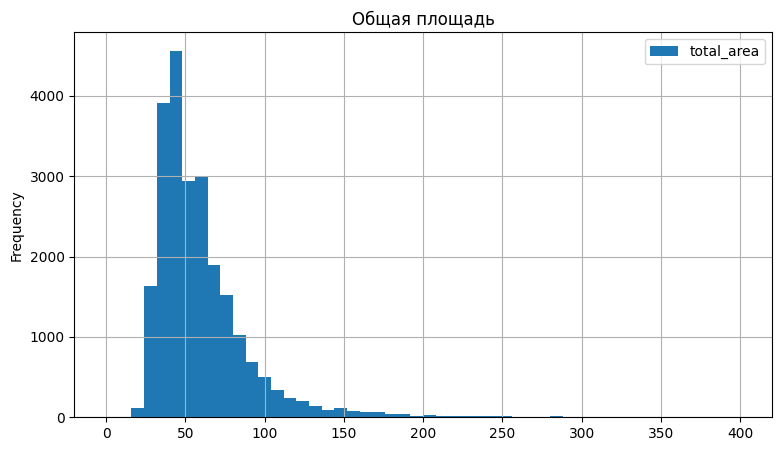

In [37]:
#Построим график площади
df.plot(kind='hist', y='total_area', range=(0,400), bins=50, figsize=(9, 5), grid=True,)
plt.title('Общая площадь')
plt.show()

На гистограме видно, что основная масса квартир площадью 50 квадратных метров

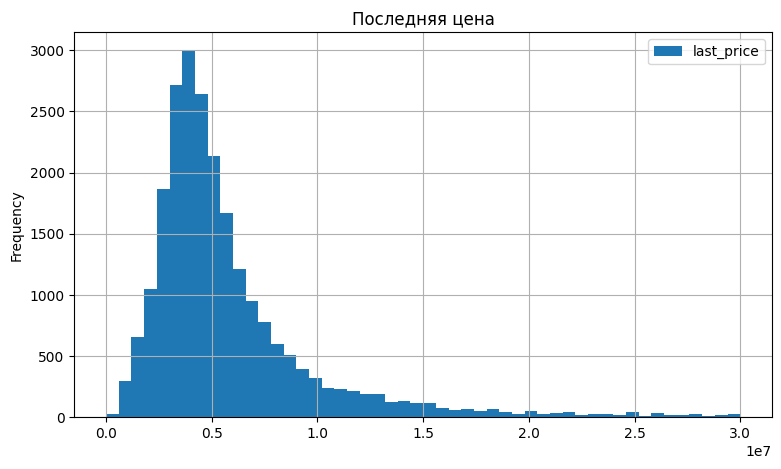

In [38]:
#Построим график цены
df.plot(kind='hist', y='last_price', bins=50, range=(0, 30000000), figsize=(9,5), grid=True)
plt.title('Последняя цена')
plt.show()

По графику стоимости становится понятно, что больше предложений на рынке до 5 млн.

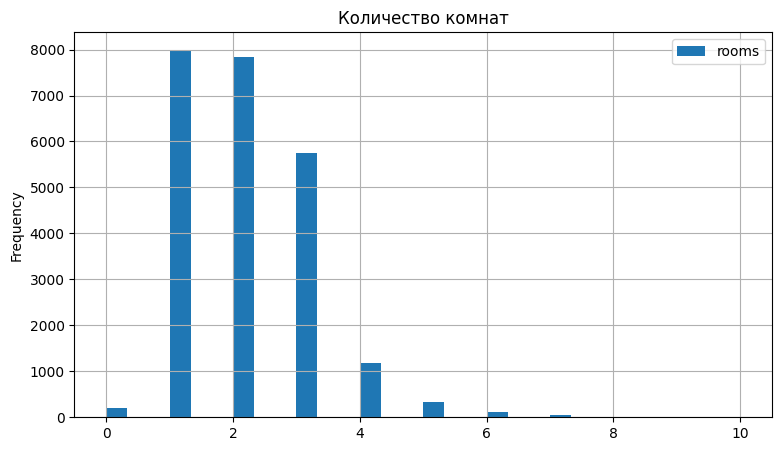

In [39]:
#Построим график числа комнат
df.plot(kind='hist', y='rooms', bins=30, range=(0,10), figsize=(9,5), grid=True)
plt.title('Количество комнат')
plt.show()

В основном в квартире от 1 до 3 комнат

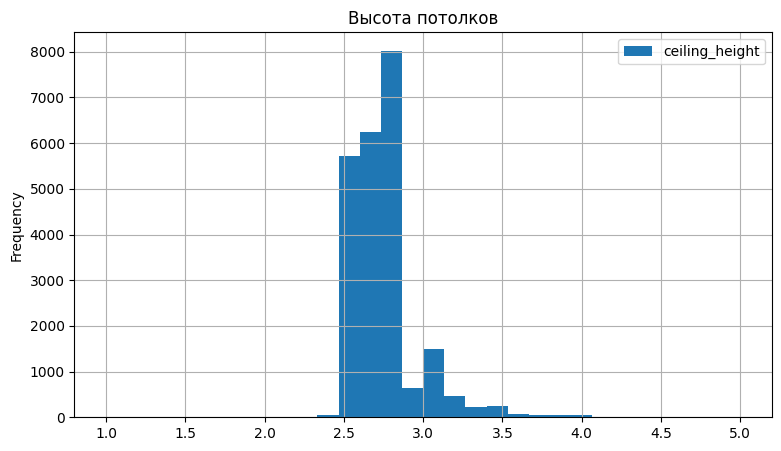

Медианная высота потолков:  2.7162564102564106


In [40]:
#Построим график высоты потолков
df.plot(kind='hist', y='ceiling_height', bins=30, range=(1,5), figsize=(9,5), grid=True)
plt.title('Высота потолков')
plt.show()
print('Медианная высота потолков: ', df['ceiling_height'].median())

Потолки встречаются чаще всего высотой от 2.5 до 3 метров

Опишем типичную квартиру, выставленную на продажу: общая площадь 50м., цена 4650000, 1 или 2 комнаты, и высота потолков 2.7

**Изучим время продажи квартиры, чтобы понять, сколько обычно занимает продажа**

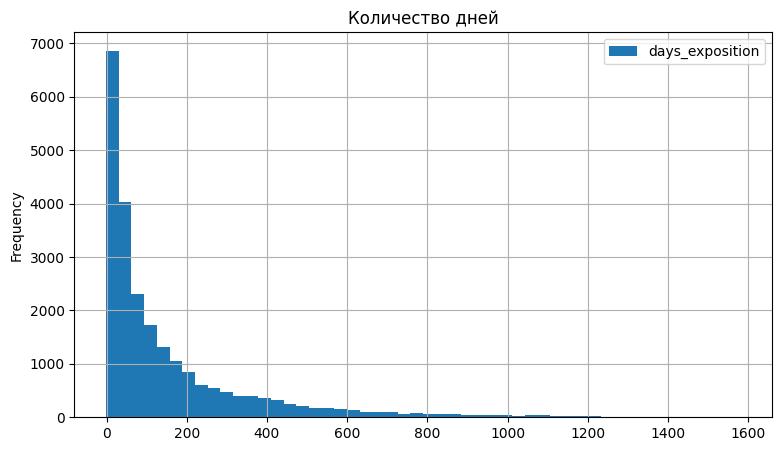

In [41]:
#Для начала построим гистограму
df.plot(kind='hist', y='days_exposition', bins=50, figsize=(9,5), grid=True)
plt.title('Количество дней')
plt.show()

На гистограме мы видим, что большая часть квартир продается до 100 дней, но также встречаются и "долгожители", которые больше похоже на аномалию

In [42]:
df['days_exposition'].mean() #посчитаем среднее значение

156.56858567349894

In [43]:
df['days_exposition'].median() #посчитаем медиану

73.0

Мы рассмотрели очень большой временной диапозон. Основная часть квартир продается в течении 200-х дней, посмотрим этот диапозон поподробнее, возможно и там вылезут некоторые интересные особенности.

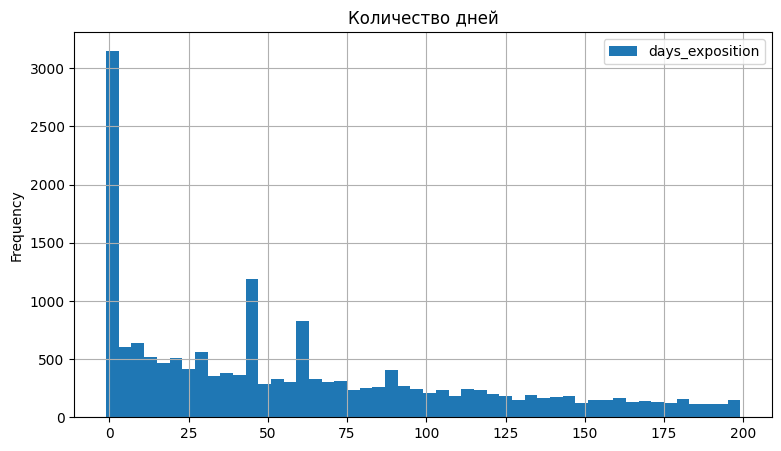

In [44]:
#Для начала отфильтруем столбец days_exposition по значению
df_day = df.query('days_exposition < 200')
df_day.plot(kind='hist', y='days_exposition', bins=50, figsize=(9,5), grid=True) #построим гистограмму
plt.title('Количество дней')
plt.show()

Мы видим большое количество объявлений с нулевым значением, это могут быть объявления, которые выкладывались ошибочно, либо продавались в рекордно-быстрые сроки. Также учитываются и специальное значение ``-1``   
Отфильтруем датафрейм 

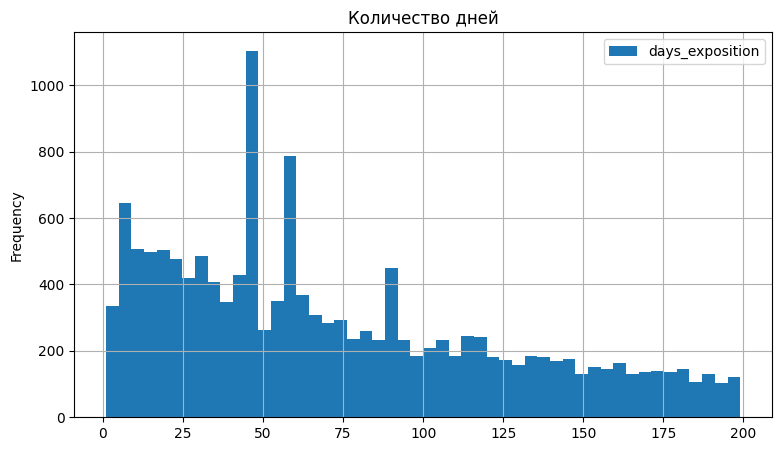

In [45]:
#Отфильтруем нулевые значения
df_day = df_day.query('days_exposition > 0')
df_day.plot(kind='hist', y='days_exposition', bins=50, figsize=(9,5), grid=True) #построим гистограмму
plt.title('Количество дней')
plt.show()

In [46]:
#Посчитаем среднее
df_day['days_exposition'].mean()

72.49968933379358

In [47]:
#И посчитаем медиану
df_day['days_exposition'].median()

60.0

В основной таблице, медиана от среднего значения отличается в два раза, это говорит о том, что есть сильные выбросы  
Когда мы ближе изучили данные до 200-х дней, мы пришли к среднему значению 72 дня и к медиане в 60 дней

Хорошее время для продажи 60 дней, если меньше 60 - это быстро, если больше - уже медленно

Также есть пики в районе 45, 60 и 90 дней, они могут означать автоматическое снятие объявления с продажи

**Проверим редкие и выбивающие значения**

In [48]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day,month,year,floor_type,ratio_living_area,ratio_kitchen_area
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,False,...,2,755.0,-1,"120,370.4",Thursday,3,2019,другой,0.5,0.2
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,False,...,0,0.0,81,"82,920.8",Tuesday,12,2018,первый,0.5,0.3
2,10,"5,196,000.0",56.0,2015-08-20,2,2.8,5,34.3,4,False,...,2,574.0,558,"92,785.7",Thursday,8,2015,другой,0.6,0.1
3,0,"64,900,000.0",159.0,2015-07-24,3,2.8,14,91.2,9,False,...,3,234.0,424,"408,176.1",Friday,7,2015,другой,0.6,0.2
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14,32.0,13,False,...,1,48.0,121,"100,000.0",Tuesday,6,2018,другой,0.3,0.4


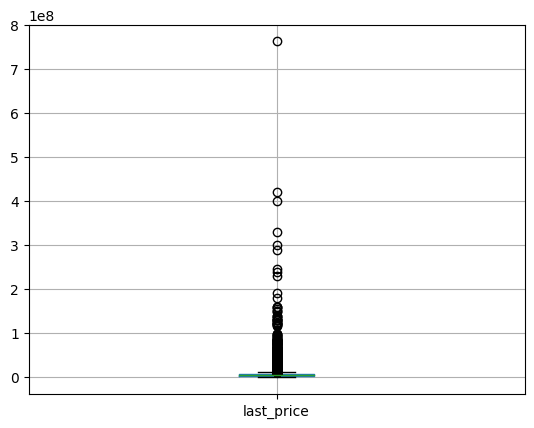

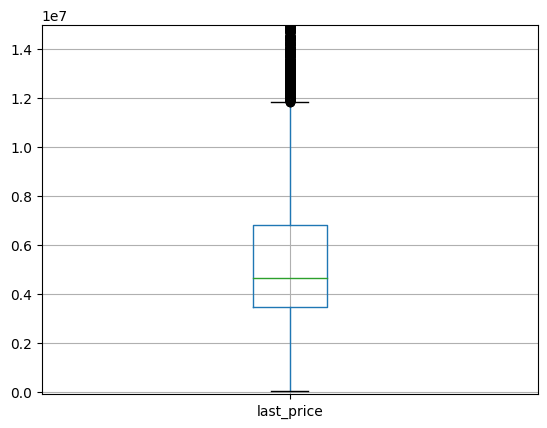

In [49]:
#Построим график по стоимости квартиры
df.boxplot('last_price')
plt.show()
df.boxplot('last_price')
plt.ylim(-100000, 15000000)
plt.show()

In [50]:
#Вычислим квартили методом describe
df['last_price'].describe()

count        23,467.0
mean      6,560,435.6
std      10,928,981.0
min          12,190.0
25%       3,450,000.0
50%       4,650,000.0
75%       6,800,000.0
max     763,000,000.0
Name: last_price, dtype: float64

In [51]:
#Рассчитаем межквартильный размах
q_1 = 34500000
q_3 = 68000000
iqr = q_3 - q_1
#Теперь найдем выбросы
v_1 = q_1 - 1.5 * iqr
v_2 = q_3 + 1.5 * iqr

print('Убираем значнеия до:', v_1, 'и после:', v_2)

Убираем значнеия до: -15750000.0 и после: 118250000.0


In [52]:
df['last_price'].loc[df['last_price'] > 118250000].count() #посчитаем количество строк

35

In [53]:
df = df.query('last_price < 118250000') #убираем выбросы

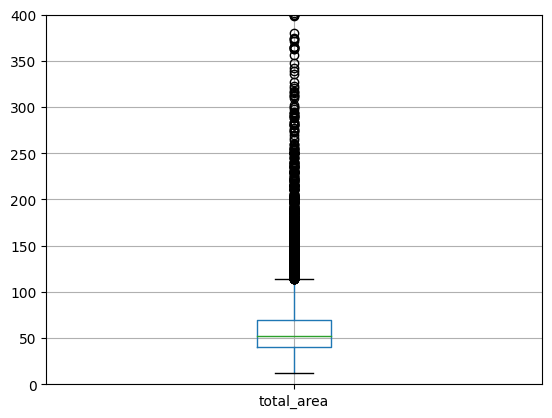

In [54]:
#Проверяем общую площадь
df.boxplot('total_area')
plt.ylim(0,400)
plt.show()

In [55]:
#Вычислим квартили методом describe
df['total_area'].describe()

count   23,432.0
mean        60.0
std         33.6
min         12.0
25%         40.0
50%         52.0
75%         69.6
max        590.0
Name: total_area, dtype: float64

In [56]:
#Рассчитаем межквартильный размах
q_1 = 40
q_3 = 69.6
iqr = q_3 - q_1
#Теперь найдем выбросы
v_1 = q_1 - 1.5 * iqr
v_2 = q_3 + 1.5 * iqr

print('Убираем значнеия до:', v_1, 'и после:', v_2)

Убираем значнеия до: -4.3999999999999915 и после: 113.99999999999999


Оставим квартиры до 114 метров

In [57]:
df['total_area'].loc[df['total_area'] > 114].count() #посчитаем количество строк с выбросами

1210

In [58]:
df = df.query('total_area <= 114') #оставляем нормальные значения для исследования

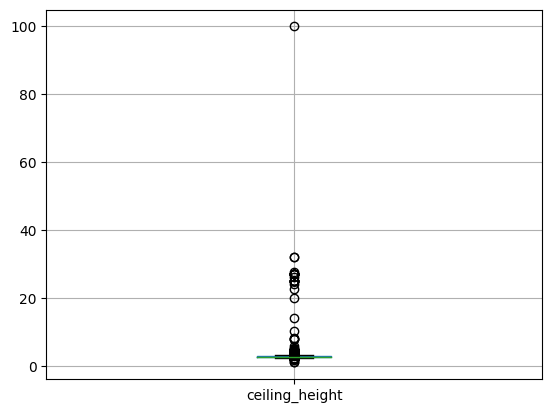

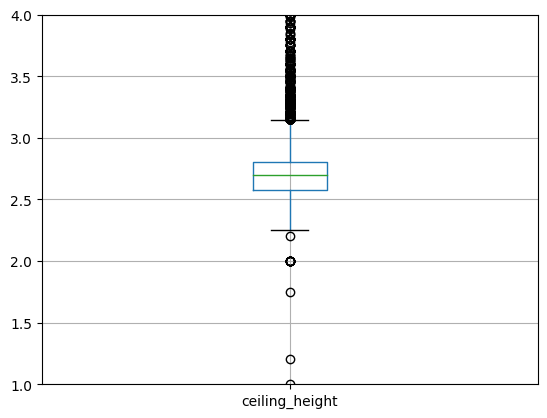

In [59]:
#Построим график по ceiling_height
df.boxplot('ceiling_height')
plt.show()
df.boxplot('ceiling_height')
plt.ylim(1,4)
plt.show()

In [60]:
#Вычислим квартили методом describe
df['ceiling_height'].describe()

count   22,222.0
mean         2.8
std          1.0
min          1.0
25%          2.6
50%          2.7
75%          2.8
max        100.0
Name: ceiling_height, dtype: float64

In [61]:
#Рассчитаем межквартильный размах
q_1 = 2.6
q_3 = 2.8
iqr = q_3 - q_1
#Теперь найдем выбросы
v_1 = q_1 - 1.5 * iqr
v_2 = q_3 + 1.5 * iqr

print('Убираем значнеия до:', v_1, 'и после:', v_2)

Убираем значнеия до: 2.3000000000000007 и после: 3.0999999999999996


Так как мы заполнили почти 50% средним значением пропуски - у нас считаются выбросами значения меньше 2.3 метров и выше 3

In [62]:
#Посчитаем количество больше и меньше нормы
df['ceiling_height'].loc[(df['ceiling_height'] > 3) | (df['ceiling_height'] < 2.3)].count() 

1245

In [63]:
#Убирем из датафрейме лишние значения
df = df.query('ceiling_height >= 2.3 and ceiling_height <= 3')

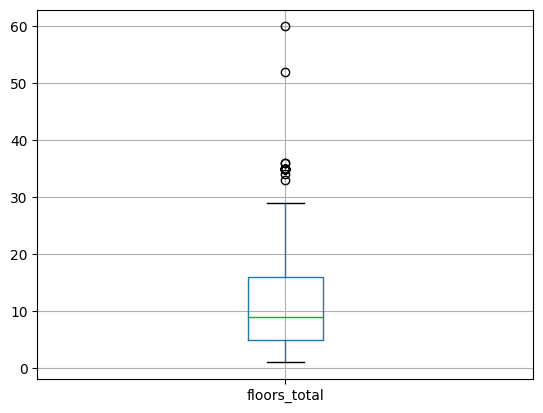

In [64]:
df.boxplot('floors_total')
plt.show()

In [65]:
df['floors_total'].loc[df['floors_total'] > 30].count() #посчитаем количество строк с выбросами

30

In [66]:
df = df.query('floors_total < 30') #убираем выбросы

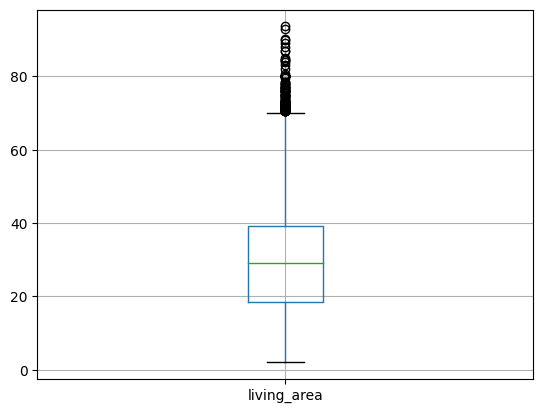

In [67]:
#Посмтроим график по жилой площади
df.boxplot('living_area')
plt.show()

Больше 65 метров уже считают значения выбросом

In [68]:
df['living_area'].loc[df['living_area'] > 65].count() #посчитаем количество строк с выбросами

240

In [69]:
#Убираем выбросы по жилой площади
df = df.query('living_area < 65')

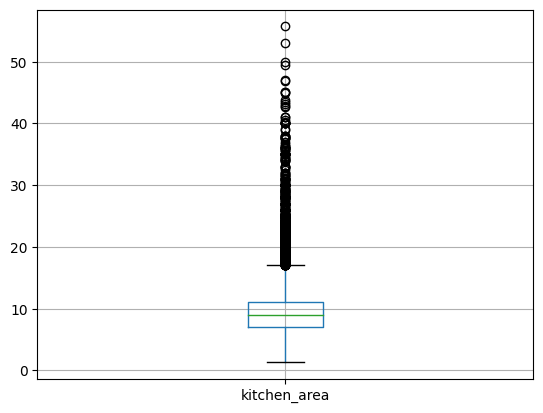

In [70]:
#Построим график с площадью кухни
df.boxplot('kitchen_area')
plt.show()

Выбросы начинается с 20 метров. Также есть значения меньше 0, это наш специальный символ

In [71]:
df['kitchen_area'].loc[df['kitchen_area'] > 20].count()  #посчитаем количество выбросов 

441

In [72]:
df = df.query('kitchen_area <= 20') #убираем выбросы из датафрейма

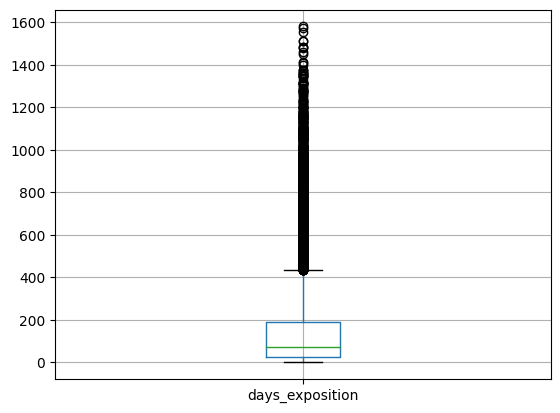

In [73]:
#Посмотрим на график по days_exposition
df.boxplot('days_exposition')
plt.show()

In [74]:
#Вычислим квартили методом describe
df['days_exposition'].describe()

count   20,252.0
mean       149.9
std        204.2
min         -1.0
25%         24.0
50%         71.0
75%        188.2
max      1,580.0
Name: days_exposition, dtype: float64

In [75]:
#Рассчитаем межквартильный размах
q_1 = 23
q_3 = 190
iqr = q_3 - q_1
#Теперь найдем выбросы
v_1 = q_1 - 1.5 * iqr
v_2 = q_3 + 1.5 * iqr

print('Убираем значнеия до:', v_1, 'и после:', v_2)

Убираем значнеия до: -227.5 и после: 440.5


Оставим значения до 440 дней

In [76]:
df['days_exposition'].loc[df['days_exposition'] > 440].count() #посмотрим на количество строк

1721

In [77]:
#убирем строки, где значение больше 440 дней
df = df.query('days_exposition < 440')

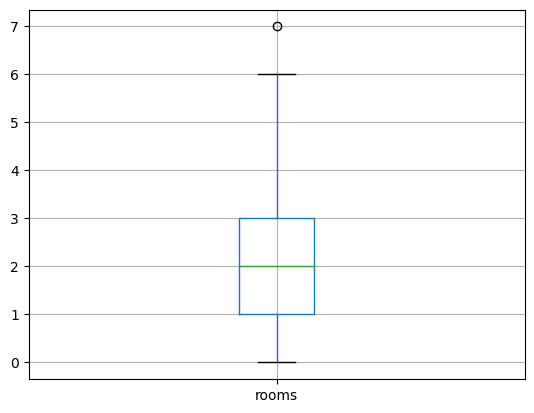

In [78]:
#Построим график с количеством комнат в доме
df.boxplot('rooms')
plt.show()

In [79]:
df['rooms'].loc[df['rooms'] == 0].count()

173

In [80]:
#Убираем нулевые значения
df = df.query('rooms != 0')

Убрали редкие и выбивающиеся значения из датафрейма, которые могли бы мешать исследованию.
Например, в столбце ``days_exposition`` были слишком долгие объявления, которые могли по 4 года висеть на платформе. Также в столбце ``rooms`` были нулевые значения, их тоже отфильтровали  
Были слишком низкие потолки в некоторых объявлениях, их мы тоже убрали

Сейчас мы посмотрим, какие факторы больше всего влияют на стоимость квартиры

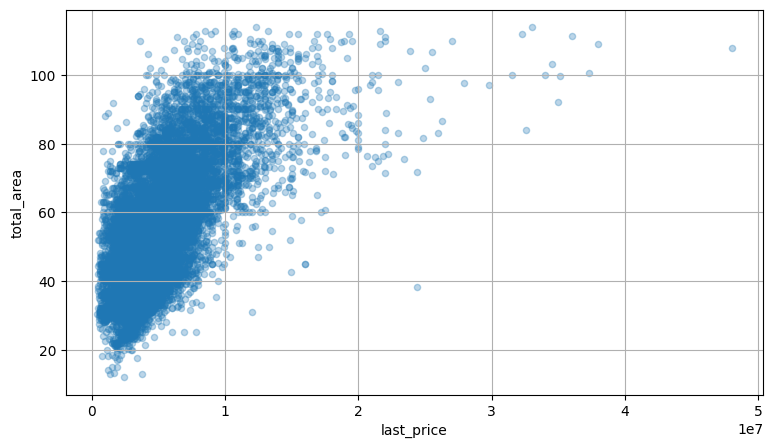

In [81]:
#Посмтроим график с общей площадью
df.plot(
    x='last_price',
    y='total_area',
    kind='scatter',
    grid=True,
    figsize=(9,5),
    alpha=0.3
);

In [82]:
df['last_price'].corr(df['total_area'])

0.6766281280144846

На графике рассеяния видна зависимость цены от площади. С помощь метода ``corr`` видна зависимость от площади квартиры.

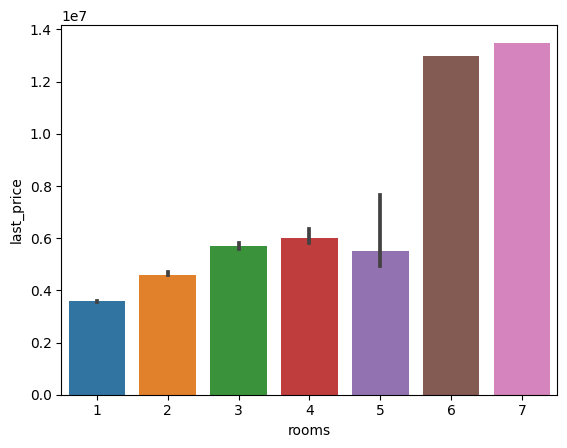

In [83]:
from numpy import median
sns.barplot(x="rooms", y="last_price", data=df, estimator=median);

Видна прямая зависимость стоимости от количества комнат, чем больше комнат- тем дороже квартира

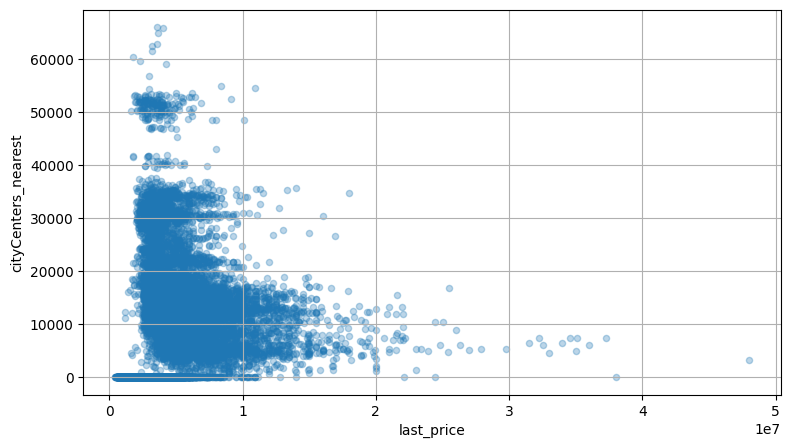

In [84]:
#Построим график с зависимостью от расстояния до центра
df.plot(
    x='last_price',
    y='cityCenters_nearest',
    kind='scatter',
    grid=True,
    figsize=(9,5),
    alpha=0.3
);

In [85]:
df['last_price'].corr(df['cityCenters_nearest'])

0.08426107858466489

Чем ближе к центру, тем больше предложений по квартирам, но разброс цен досточно высокий. Но чем ближе к центру, тем больше вариантов за более высокую стоимость, поэтому, можно сказать, что это влияет на стоимость.

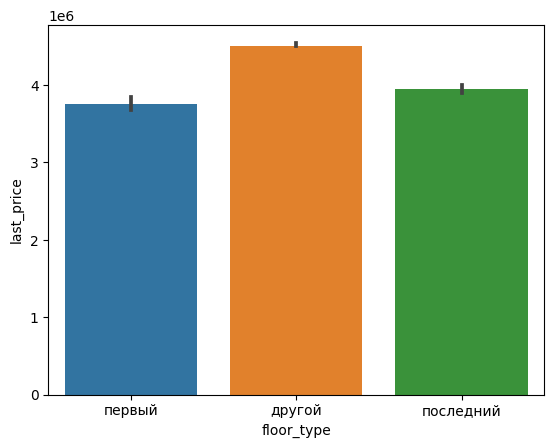

In [86]:
#Посмтроим график по категории этажа
sns.barplot(x="floor_type", y="last_price", data=df, estimator=median);

На первом этаже меньше дорогих вариантов, на последнем тоже видно, что дорогих варинтов поменьше, чем в категории "другой". Но это может быть связано с тем, что в категории "другой" больше этажей

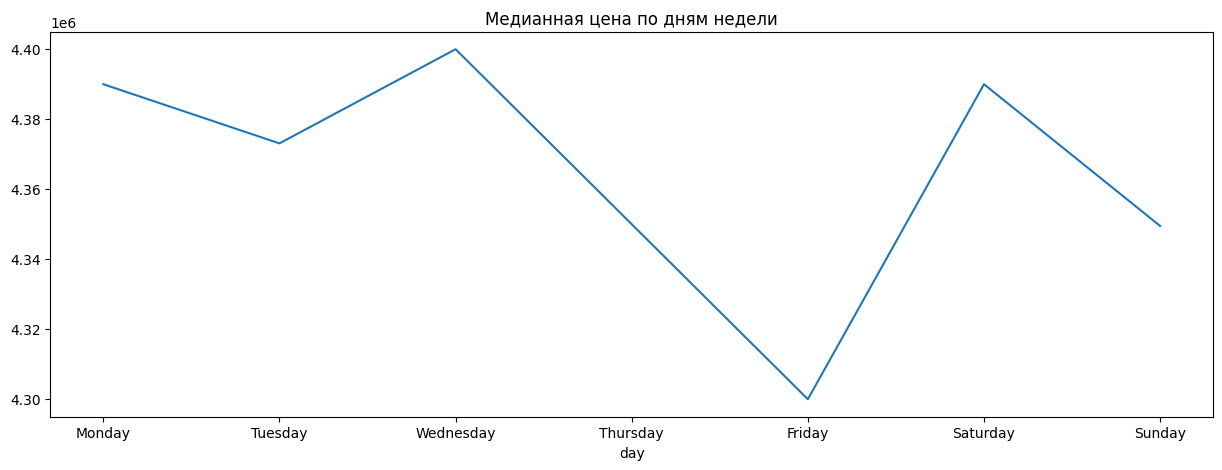

In [87]:
#Рассмотрим зависимость от дня недели
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('day')['last_price'].median().reindex(weekdays).plot(figsize = (15,5), title = 'Медианная цена по дням недели')
plt.show()

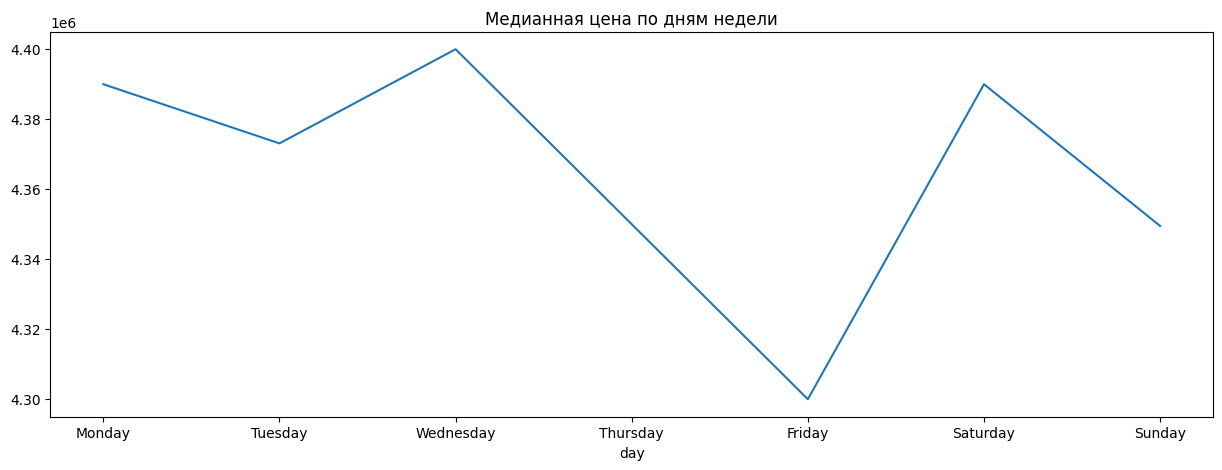

In [88]:
#Код ревьюера
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('day')['last_price'].median().reindex(weekdays).plot(figsize = (15,5), title = 'Медианная цена по дням недели')
plt.show()

По линейному графику видно, что цена к концу недели снижается

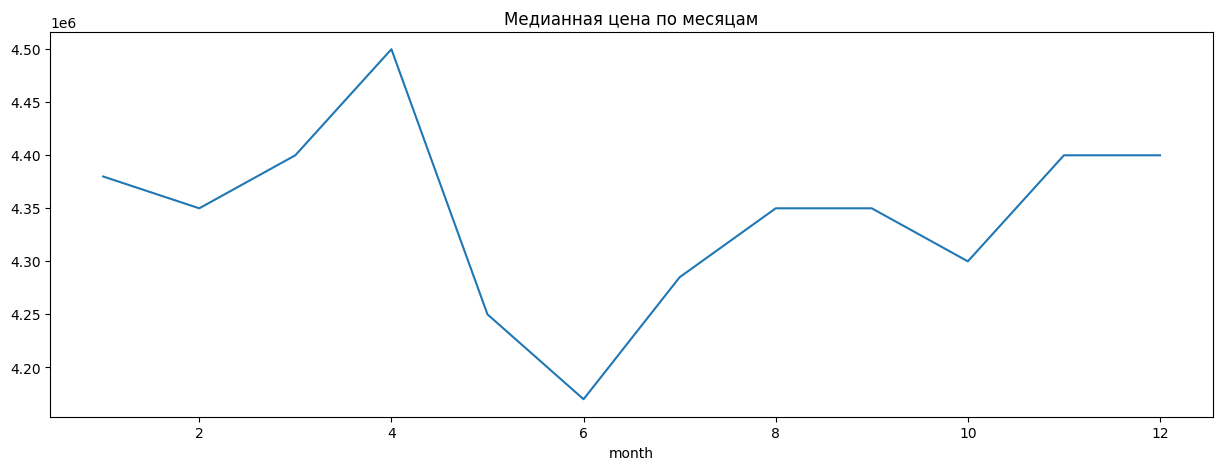

In [89]:
#Рассмотрим зависимость от месяца
df.groupby('month')['last_price'].median().plot(figsize = (15,5), title = 'Медианная цена по месяцам')
plt.show()

В летний период стоимость за квартиру сниажется 

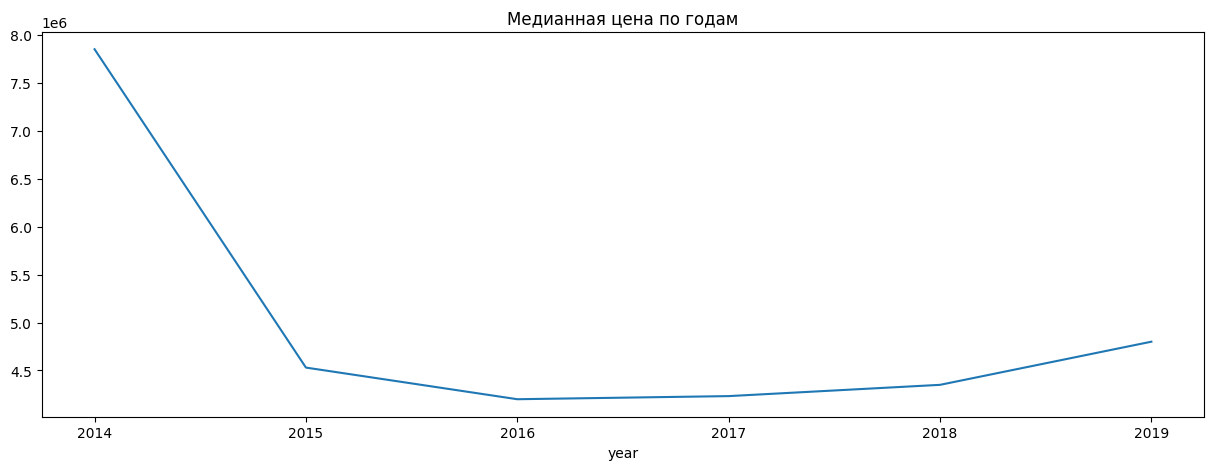

In [90]:
df.groupby('year')['last_price'].median().plot(figsize = (15,5), title = 'Медианная цена по годам')
plt.show()

In [91]:
df['last_price'].corr(df['year'])

0.028314435009430948

C 2015 года упала стоимость и к 2019 потихоньку поднимается

Мы выяснили, что на стоимость больше всего влияет: площадь квартиры, количество комнат и расстояние до центра, немного влияет, на каком этаже находится квартира

Также выяснили, что к выходным стоимость становится меньше, в летнее время цена тоже ниже, чем в остальное и с 2015 года произошло снижение цены 

Определим 10 населенных пунктов с наибольшим количеством объявлений

In [92]:
#Группируем список населенных пунктов по количеству объявлений и средней цене за квадратный метр
sities_group = df.pivot_table(index='locality_name', values='price_square_meter', 
                              aggfunc=('count', 'mean')).astype('int')

In [93]:
#Сортируем данные по убыванию количества объявлений
top_ten_sities = sities_group.sort_values(by='count', ascending=False).reset_index()
top_ten_sities = top_ten_sities.head(10)
top_ten_sities

,locality_name,count,mean
0,Санкт-Петербург,11744,108013
1,Мурино,508,85889
2,посёлок Шушары,396,78255
3,Кудрово,389,95617
4,Всеволожск,337,68770
5,Колпино,301,75372
6,посёлок Парголово,299,90164
7,Пушкин,292,100407
8,Гатчина,266,68696
9,Выборг,193,57933


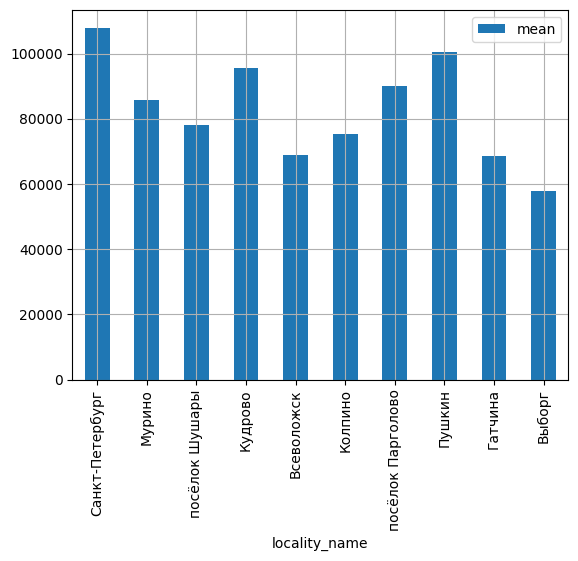

In [94]:
#Посмотроим столбчатую диаграмму 
top_ten_sities.plot(
    x='locality_name',
    y='mean',
    kind='bar',
    grid=True
)
plt.show()

С помощью диаграммы мы видим, что Выборг с самой низкой стоимостью жилья, а Санкт-Петербург на 1 месте по цене за квадратный метр

Теперь изучим предложения квартир в Санкт-Петербурге

In [95]:
#Создадим столбец, которые показывает растоение до центра в километрах
df['center_km'] = round(df['cityCenters_nearest']/1000, 0).astype('int')
df['price_km'] = round(df['last_price']/df['center_km'], 0) #и посчитаем, сколько стоит 1 км

spb_df = df.loc[df['locality_name'] == 'Санкт-Петербург'] #выделим квартиры в Санкт-Петербурге

spb_df_mean = spb_df.groupby('center_km', as_index=False)['price_km'].mean().round() #посчитаем среднюю цену для каждого километра

spb_df_mean.head(10)

,center_km,price_km
0,0,NaN
1,1,"9,120,388.0"
2,2,"4,356,557.0"
3,3,"2,577,892.0"
4,4,"1,972,671.0"
5,5,"1,764,956.0"
6,6,"1,330,175.0"
7,7,"1,158,559.0"
8,8,"866,443.0"
9,9,"651,384.0"


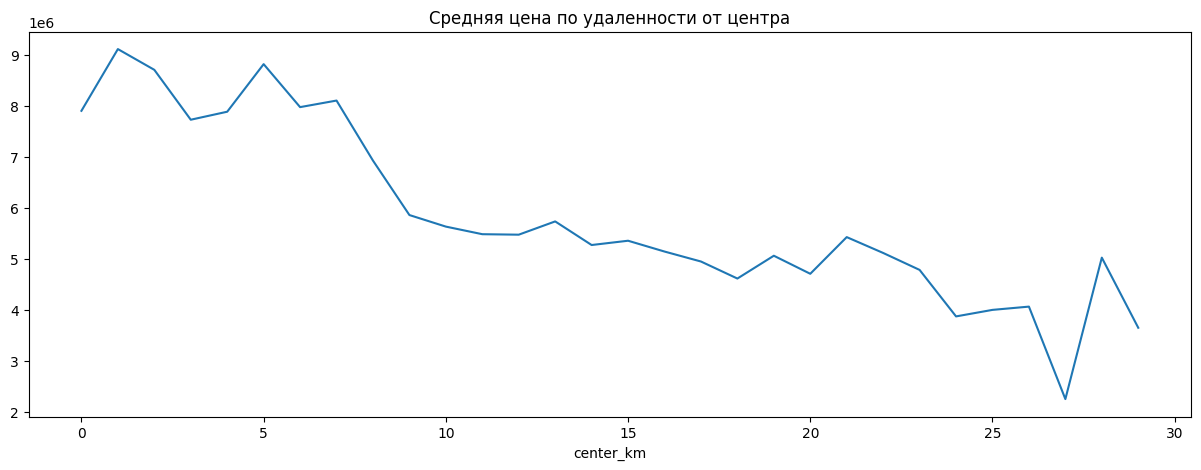

In [96]:
#Посмтроим график, который покажет, как цена зависит от удалённости от центра
df[df['locality_name'] == 'Санкт-Петербург'].groupby('center_km')['last_price'].mean().plot(figsize = (15, 5))
plt.title('Средняя цена по удаленности от центра')
plt.show()

Мы видим резкое подение цены в районе 8-9км. Центром обозначим квартиры до 9 км.

Проанализируем квартиры в центре

In [97]:
#Для начала отфильтруем данные и добавим в переменную только квартиры, которые в центре
center = df.query('center_km <= 9 and locality_name == "Санкт-Петербург" ')
len(center)

2367

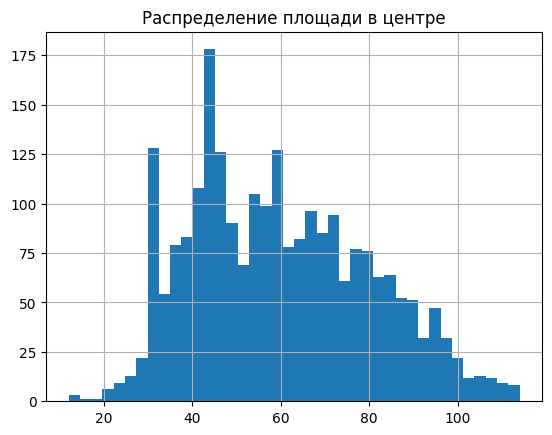

Медианная площадь в центре: 58.0


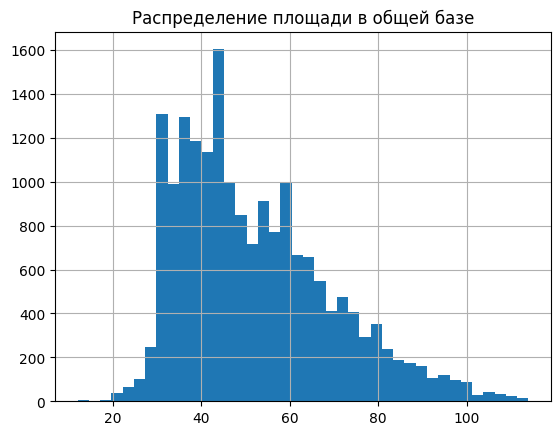

Медианная площадь в общей базе: 48.1


In [98]:
#Сравним центр и все объявления по площади

center['total_area'].hist(bins = 40)
plt.title('Распределение площади в центре')
plt.show()
print('Медианная площадь в центре:', center['total_area'].median())

df['total_area'].hist(bins = 40)
plt.title('Распределение площади в общей базе')
plt.show()
print('Медианная площадь в общей базе:', df['total_area'].median())

Мы видим, что в центре медианная площадь больше, чем в общей базе

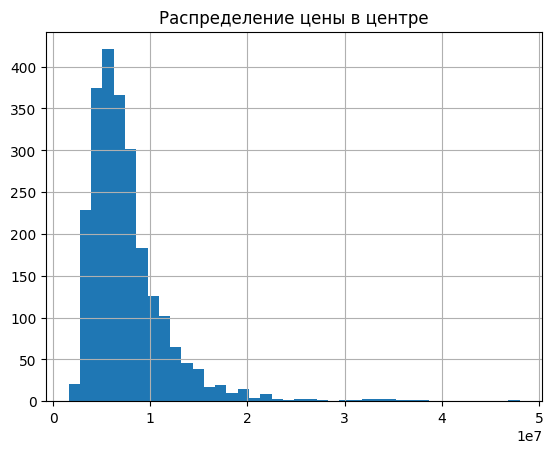

Медианная стоимость в центре: 6650000.0


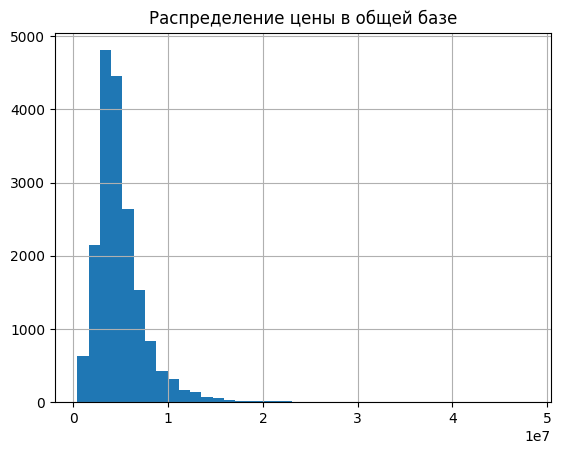

Медианная стоимость в общей базе: 4350000.0


In [99]:
#Теперь сравним по стоимости 2 датафрейма
center['last_price'].hist(bins = 40)
plt.title('Распределение цены в центре')
plt.show()
print('Медианная стоимость в центре:', center['last_price'].median())

df['last_price'].hist(bins = 40)
plt.title('Распределение цены в общей базе')
plt.show()
print('Медианная стоимость в общей базе:', df['last_price'].median())

Медианная стоимость тоже выше в центре, чем в общей базе

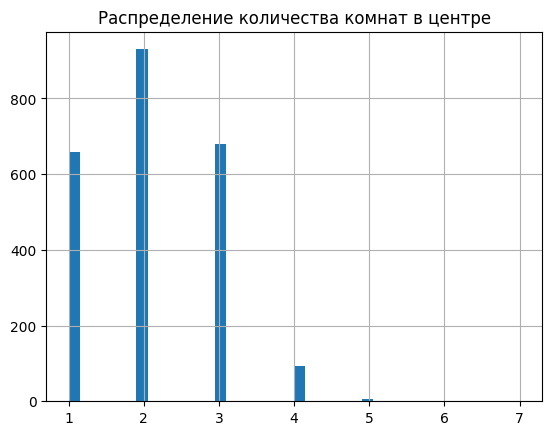

Медианное количество в центре: 2.0


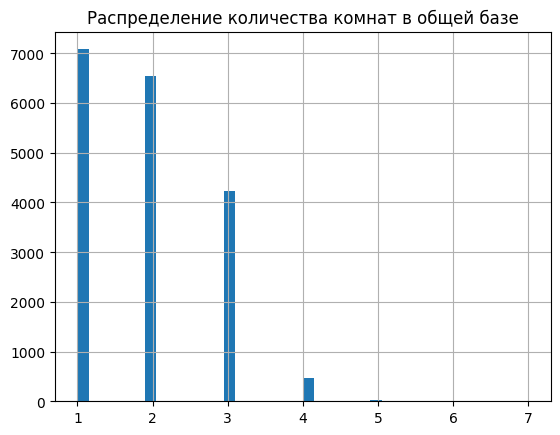

Медианное количество в общей базе: 2.0


In [100]:
#Построим графики по количеству комнат и сравним
center['rooms'].hist(bins=40)
plt.title('Распределение количества комнат в центре')
plt.show()
print('Медианное количество в центре:', center['rooms'].median())

df['rooms'].hist(bins=40)
plt.title('Распределение количества комнат в общей базе')
plt.show()
print('Медианное количество в общей базе:', df['rooms'].median())

Медианное значение одинаковое, но в центре наблюдается больше 2-х комнатных квартир, а в общей базе больше однушек

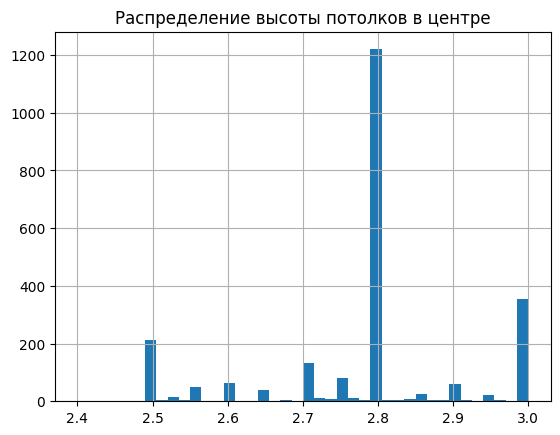

Медианная высота в центре: 2.8037173137876388


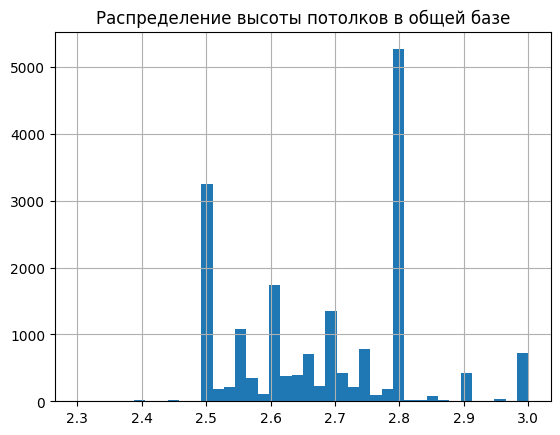

Медианная высота в общей базе 2.7


In [101]:
#И сравним по высоте потолков
center['ceiling_height'].hist(bins=40)
plt.title('Распределение высоты потолков в центре')
plt.show()
print('Медианная высота в центре:', center['ceiling_height'].median())

df['ceiling_height'].hist(bins=40)
plt.title('Распределение высоты потолков в общей базе')
plt.show()
print('Медианная высота в общей базе', df['ceiling_height'].median())

Есть явный пик по высоте 2.8м.  
Разницы по медианному значению почти нет

Определим, какие факторы влияют на стоимость квартиры. Начнем с количества комнат

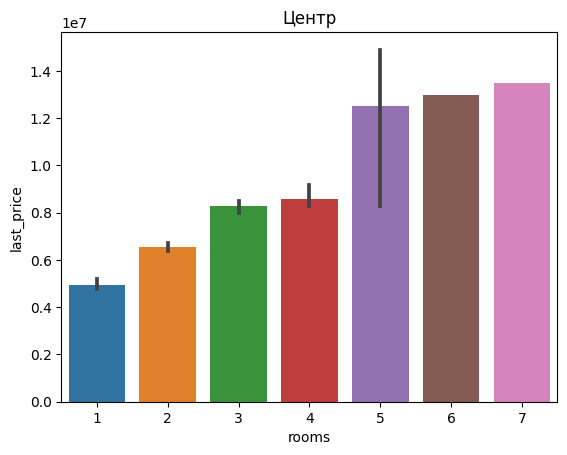

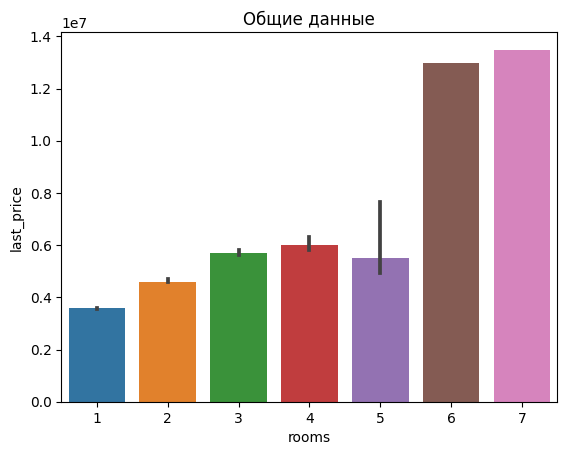

In [102]:
sns.barplot(x="rooms", y="last_price", data=center, estimator=median)
plt.title('Центр')
plt.show()

sns.barplot(x="rooms", y="last_price", data=df, estimator=median)
plt.title('Общие данные');

Как мы видим, что распределение по стоимости такое же

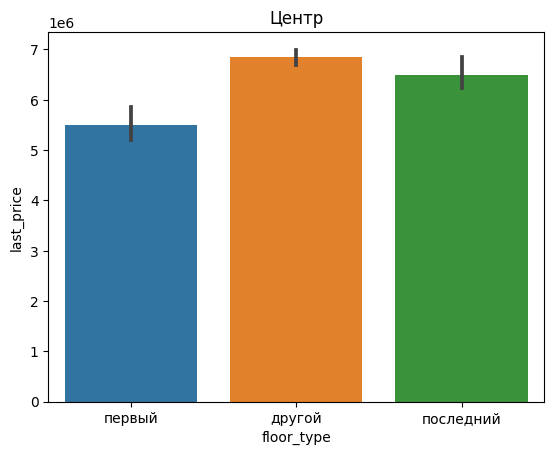

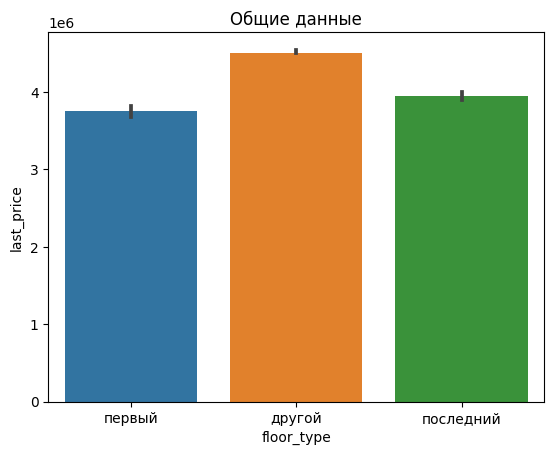

In [103]:
#построим графики по этажам
sns.barplot(x="floor_type", y="last_price", data=center, estimator=median)
plt.title('Центр')
plt.show()

sns.barplot(x="floor_type", y="last_price", data=df, estimator=median)
plt.title('Общие данные');

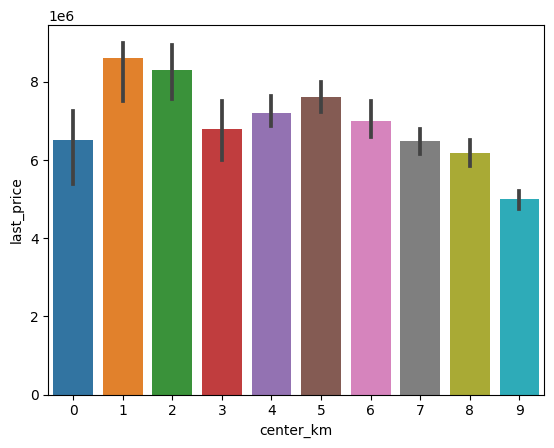

In [104]:
#Посмтроим график с зависимостью стоимости и удаленности от центра
sns.barplot(x="center_km", y="last_price", data=center, estimator=median)
plt.show()

Нулевые значения образовались, когда мы отметили растояние до центра специальным символом ``-1``

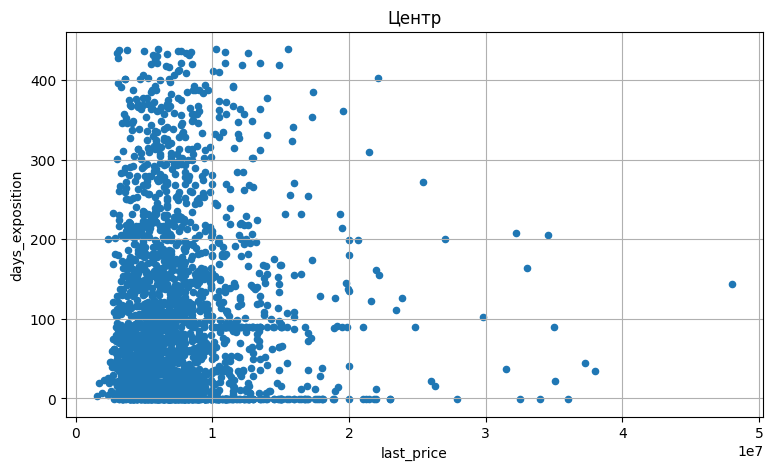

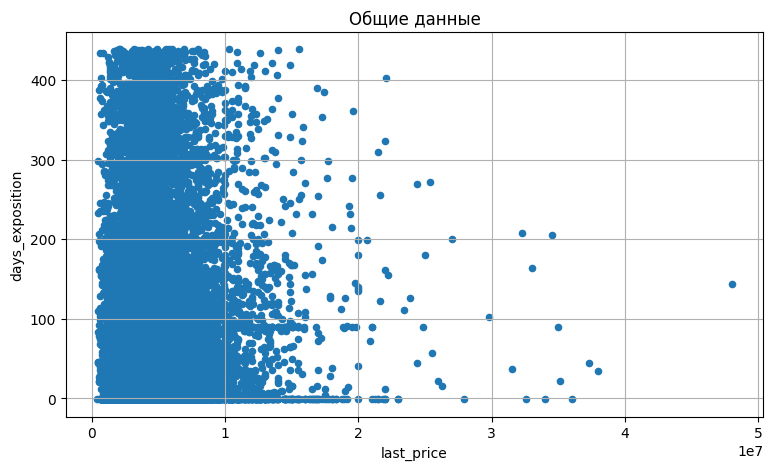

In [105]:
#Посмтроим графики с зависимостью стоимости и даты размещения объявления
center.plot(
    kind='scatter',
    x='last_price',
    y='days_exposition',
    grid=True,
    figsize=(9,5)
)
plt.title('Центр')
plt.show()

df.plot(
    kind='scatter',
    x='last_price',
    y='days_exposition',
    grid=True,
    figsize=(9,5)
)
plt.title('Общие данные');

Квартиры в центре отличаются только стоимостью, по графикам все тоже самое

## Общий вывод

В нашем распоряжении были данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
Задача была: научиться определять рыночную стоимость объектов недвижимости. Для этого нужно установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Мы изучили данные, и выяснили, что на стоимость влияют: площадь квартиры, количество комнат, на каком этаже она находится и растояние от центра. Это основные параметры, которые влияют на стоимость квартиры.

Также выяснили, что к выходным стоимость становится меньше, в летнее время цена тоже ниже, чем в остальное и с 2015 года произошло снижение цены

Определили центр Санкт-петербурга, расстояние до 9км.

Если квартира была продана за 60 дня, это хороший показатель, если больше, то нужно посмотреть параметры по квартире, возможно, что-то не соответствует и мешает продаже квартиры.  
Также есть пики в районе 45, 60 и 90 дней, они могут означать автоматическое снятие объявления с продажи

Были сложности с неявными дублями по населенным пунктам. В системе можно сделать готовые варианты населенных пунктов, чтобы пользователь мог найти вариант из уже готовых, тогда мы сможем избавиться от дублей.

Из-за дублей появились пропуски, где система сама прописывает значения.